In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First look

In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/catharzis/penguins/master/penguins.csv")

In [145]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [146]:
# options of rows
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_rows', 10)

In [147]:
df.shape

(344, 7)

In [148]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [149]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [150]:
df.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


Dataset constists 7 cols.

* species – type of peng
* island – name of island where he lives
* bill_legth_mm – legth of culmen**
* bill_depth_mm - depth of culmen**
* flipper_length_mm – length of flipper
* body_mass – mass of body
* sex – sex

** culmen is the upper ridge of a bird's beak

# Missings

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [152]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [153]:
# function for percentage
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [154]:
missing(df)

,Missing_Number,Missing_Percent
sex,11,0.031977
body_mass_g,2,0.005814
flipper_length_mm,2,0.005814
bill_depth_mm,2,0.005814
bill_length_mm,2,0.005814
island,0,0.000000
species,0,0.000000


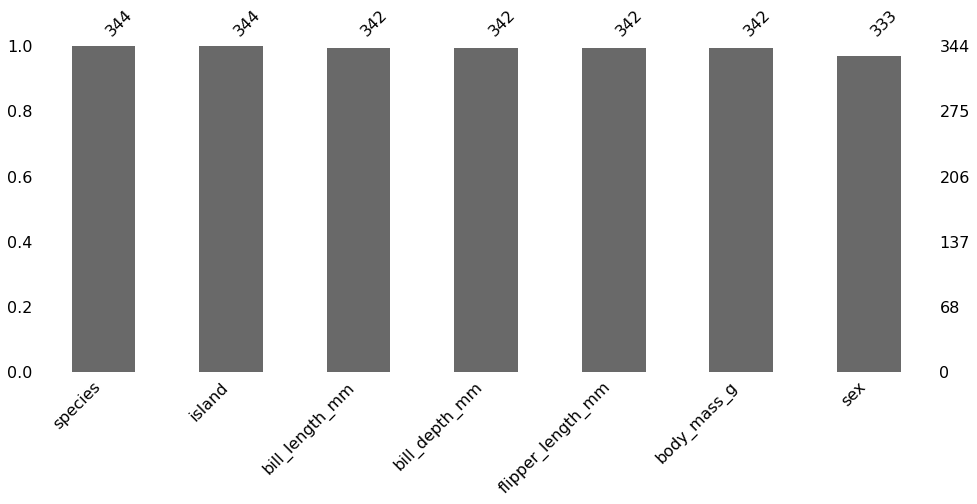

In [155]:
# missongno
import missingno as msno
msno.bar(df, figsize=(16, 6))

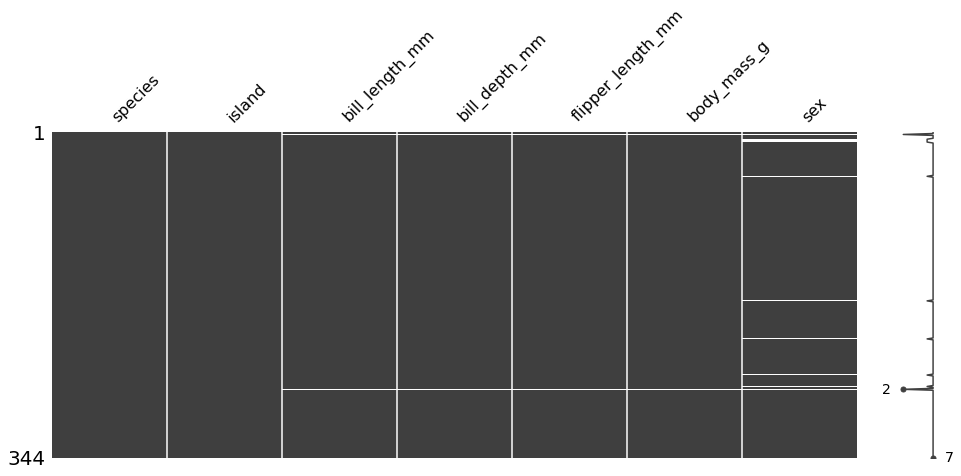

In [156]:
msno.matrix(df, figsize=(16, 6));

# EDA

How we can do EDA? If most of features are category? corr() method works only with num's.

In [157]:
# same as pivot
df.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


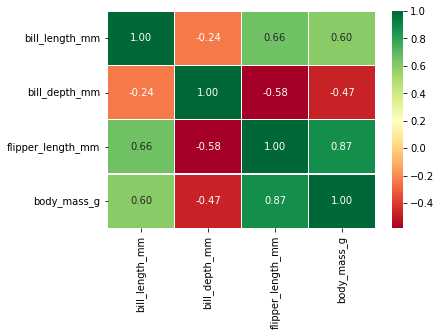

In [158]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt=".2f",
            cmap="RdYlGn");

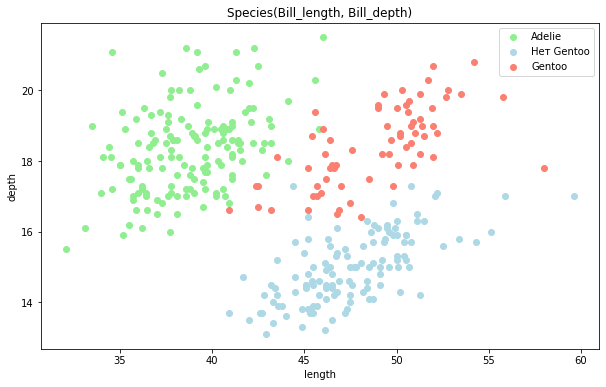

In [159]:
plt.figure(figsize=(10, 6))

plt.scatter(df.bill_length_mm[df.species=='Adelie'],
            df.bill_depth_mm[df.species=='Adelie'],
            c='lightgreen')

plt.scatter(df.bill_length_mm[df.species=='Gentoo'],
            df.bill_depth_mm[df.species=='Gentoo'],
            c='lightblue')

plt.scatter(df.bill_length_mm[df.species=='Chinstrap'],
            df.bill_depth_mm[df.species=='Chinstrap'],
            c='salmon')

plt.title("Species(Bill_length, Bill_depth)")
plt.xlabel("length")
plt.ylabel("depth")
plt.legend(["Adelie", "Нет Gentoo", "Gentoo"]);

In [160]:
# species depending of island
speies_island_cross = pd.crosstab(df.species, df.island)
speies_island_cross

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


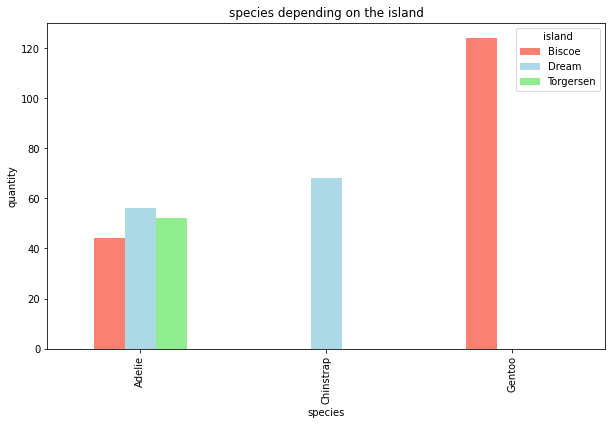

In [161]:
speies_island_cross.plot(kind = 'bar', 
                         figsize = (10,6),
                         color=['salmon', 'lightblue', 'lightgreen']);

plt.title('species depending on the island')
plt.xlabel("species")
plt.ylabel("quantity");

In [162]:
list(df.describe())

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [163]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

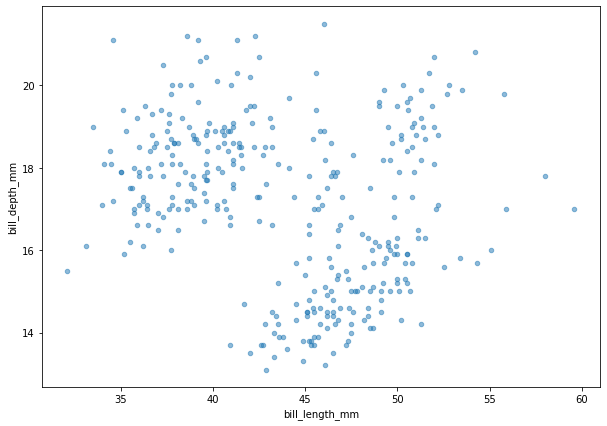

In [164]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm',
        figsize=(10,7), alpha=0.5,
        #c='sex',
        cmap=plt.get_cmap("viridis"), sharex=False);

In [165]:
df.duplicated().sum()

0

In [166]:
print(list(df.describe()))
print(df.columns)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [167]:
import plotly.express as px

fig = px.histogram(df, x="body_mass_g", title='body_mass_g', width=800, height=400)
fig.show()

# Deviding types of data

1 способ (direct)

In [168]:
df_num = df[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
df_cat = df[['sex', 'island', 'species']]

2 способ

In [169]:
# df_numerical = df.select_dtypes(include = [np.number])
# df_categorical = df.select_dtypes(exclude = [np.number])

3 способ

In [170]:
# df.select_dtypes(include=['object']).head(2)
# df.select_dtypes(include=['float64']).head(2)

Бонус

In [171]:
df.describe().columns # fast get num features

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

# Numerical features

In [172]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   body_mass_g        342 non-null    float64
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


In [173]:
df_num.describe()

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
count,342.000000,342.000000,342.000000,342.000000
mean,4201.754386,43.921930,17.151170,200.915205
std,801.954536,5.459584,1.974793,14.061714
min,2700.000000,32.100000,13.100000,172.000000
25%,3550.000000,39.225000,15.600000,190.000000
50%,4050.000000,44.450000,17.300000,197.000000
75%,4750.000000,48.500000,18.700000,213.000000
max,6300.000000,59.600000,21.500000,231.000000


In [174]:
print(df_num.nunique()) # weird, but it's ok

body_mass_g           94
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
dtype: int64


spies (if I use not direct method)

In [175]:
# spy_columns = df_numerical[['колонка1', 'колока2', 'колонка3']]#выделяем колонки-шпионы и записываем в отдельную dataframe
# df_numerical.drop(labels=['колонка1', 'колока2', 'колонка3'], axis=1, inplace = True)#вырезаем эти колонки из количественных данных
# df_categorical.insert(1, 'колонка1', spy_columns['колонка1']) #добавляем первую колонку-шпион в качественные данные
# df_categorical.insert(1, 'колонка2', spy_columns['колонка2']) #добавляем вторую колонку-шпион в качественные данные
# df_categorical.insert(1, 'колонка3', spy_columns['колонка3']) #добавляем третью колонку-шпион в качественные данные

Check zeroes

In [176]:
# check zeroes
df_num.describe().min()

body_mass_g          342.000000
bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
dtype: float64

In [177]:
# check zeros 2
for i in df_num.columns:
    print(i, df[i][df[i]==0].count())

body_mass_g 0
bill_length_mm 0
bill_depth_mm 0
flipper_length_mm 0


Check NaN's

In [178]:
# check NaN's
df_num.isnull().sum().sort_values(ascending=False)

flipper_length_mm    2
bill_depth_mm        2
bill_length_mm       2
body_mass_g          2
dtype: int64

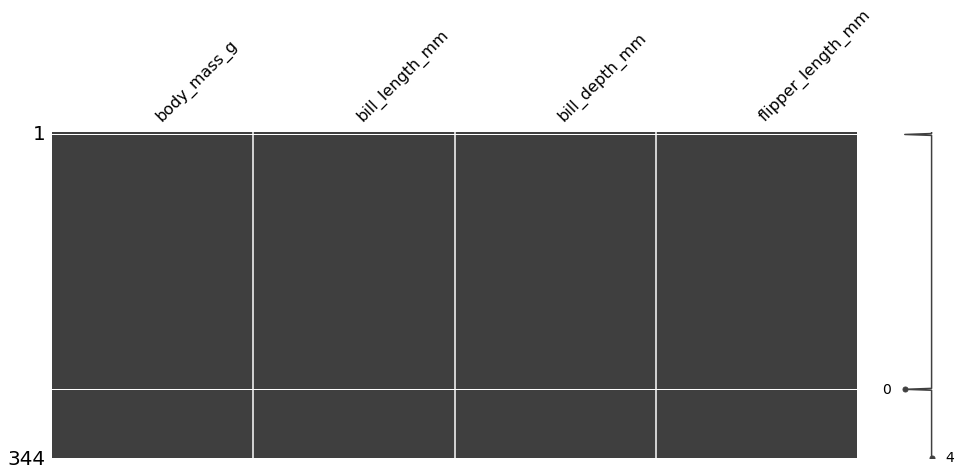

In [179]:
# visualize NaN's
msno.matrix(df_num, figsize=(16, 6));

## Imputation

In [180]:
df_num.dropna(inplace=True)# Удаляем строчки с пустыми значениями, если потом останется достаточно данных для обучения

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
df_num.isnull().sum()

body_mass_g          0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
dtype: int64

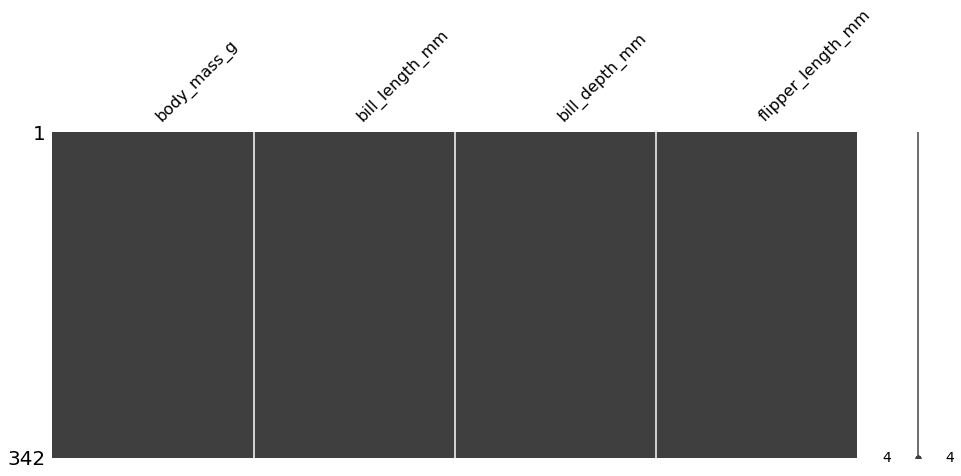

In [182]:
msno.matrix(df_num, figsize=(16, 6));

## Gystograms

In [183]:
import matplotlib.pyplot as plt

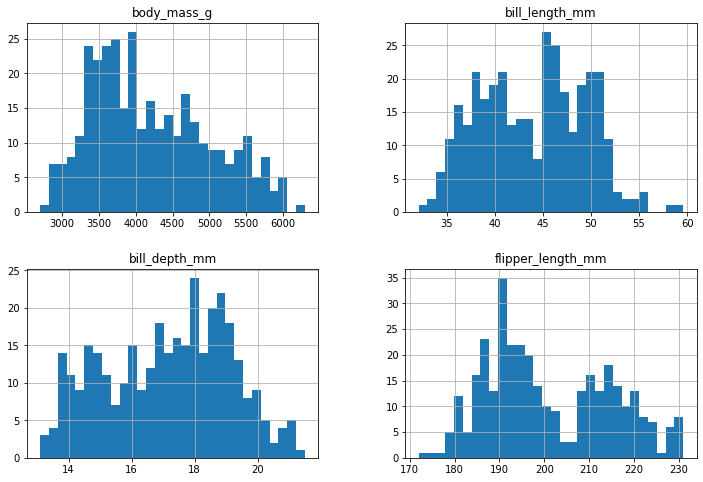

In [184]:
df_num.hist(bins=30, figsize=(12,8));

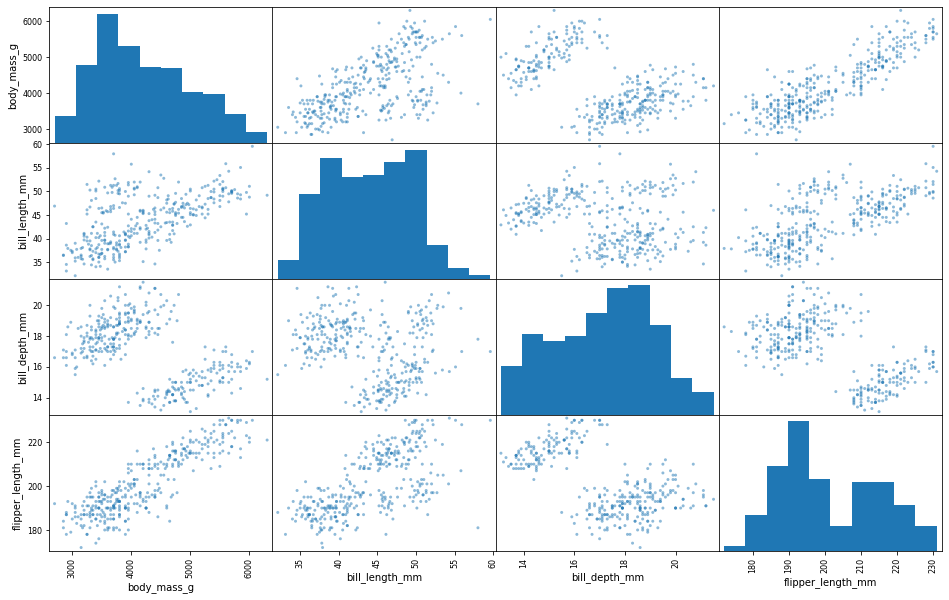

In [185]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(16, 10));

## Correlations

In [186]:
import seaborn as sns

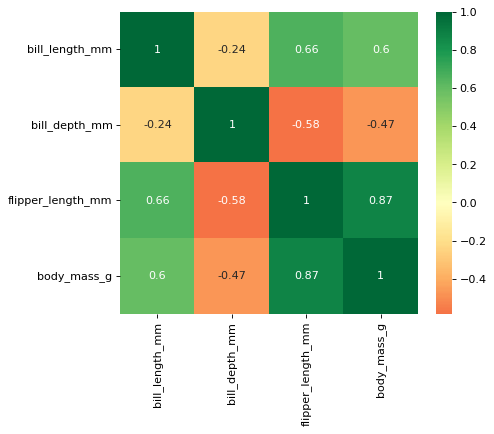

In [187]:
plt.figure(figsize=(6, 5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            cmap='RdYlGn',
            center=0,
            annot=True);

## Pivot tables

In [188]:
pd.pivot_table(df, index = 'species')

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
species,,,,
Adelie,18.346358,38.791391,3700.662252,189.953642
Chinstrap,18.420588,48.833824,3733.088235,195.823529
Gentoo,14.982114,47.504878,5076.016260,217.186992


In [189]:
pd.pivot_table(df,
               index = 'species',
               values = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
species,,,,
Adelie,18.346358,38.791391,3700.662252,189.953642
Chinstrap,18.420588,48.833824,3733.088235,195.823529
Gentoo,14.982114,47.504878,5076.016260,217.186992


In [190]:
pd.pivot_table(df, index=['species', 'sex'])

bill_depth_mm  bill_length_mm  body_mass_g  flipper_length_mm
species   sex                                                                  
Adelie    female      17.621918       37.257534  3368.835616         187.794521
          male        19.072603       40.390411  4043.493151         192.410959
Chinstrap female      17.588235       46.573529  3527.205882         191.735294
          male        19.252941       51.094118  3938.970588         199.911765
Gentoo    female      14.237931       45.563793  4679.741379         212.706897
          male        15.718033       49.473770  5484.836066         221.540984

In [191]:
pd.pivot_table(df,
               index=['species', 'sex'],
               values=['body_mass_g'])

body_mass_g
species   sex                
Adelie    female  3368.835616
          male    4043.493151
Chinstrap female  3527.205882
          male    3938.970588
Gentoo    female  4679.741379
          male    5484.836066

# Categorical features

In [192]:
df_cat.head(5)

,sex,island,species
0,male,Torgersen,Adelie
1,female,Torgersen,Adelie
2,female,Torgersen,Adelie
3,NaN,Torgersen,Adelie
4,female,Torgersen,Adelie


In [193]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      333 non-null    object
 1   island   344 non-null    object
 2   species  344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [194]:
print(df_cat.nunique()) # weird, but it's ok

sex        2
island     3
species    3
dtype: int64


In [195]:
# check NaN's
df_cat.isnull().sum().sort_values(ascending=False)

sex        11
species     0
island      0
dtype: int64

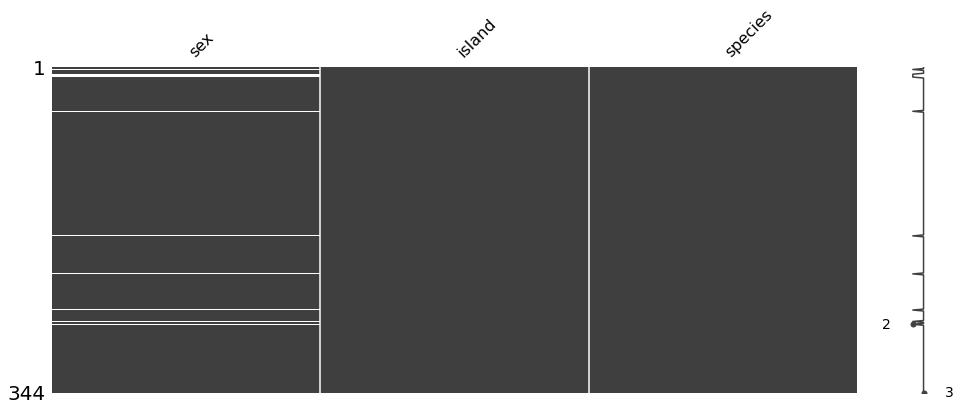

In [196]:
msno.matrix(df_cat, figsize=(16, 6));

### Imputaion

In [197]:
# import random # импортируем random
# df_cat["sex"].fillna(lambda x: random.choice(df[df[column] != np.nan]["sex"]), inplace=True) #вставляем рандомные

In [198]:
df_cat.dropna(inplace=True) # Удаляем строчки с пустыми значениями, если потом останется достаточно данных для обучения

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
df_cat.isnull().sum()

sex        0
island     0
species    0
dtype: int64

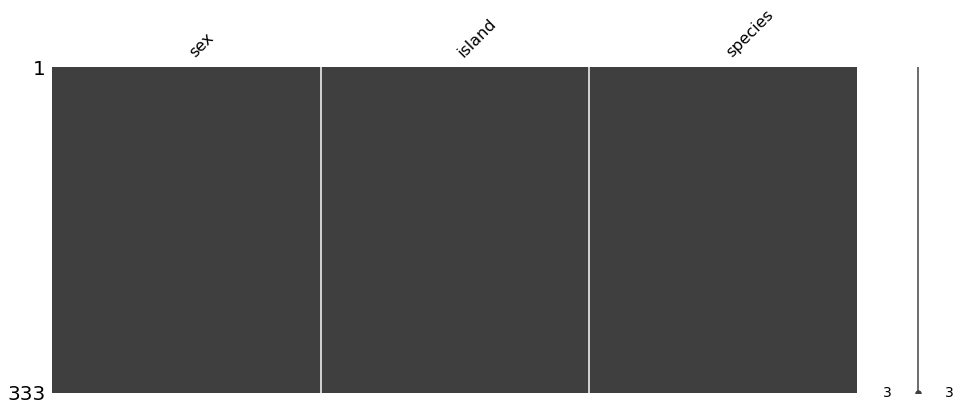

In [200]:
msno.matrix(df_cat, figsize=(16, 6));

## Encoding

In [201]:
df_cat.head(3)

,sex,island,species
0,male,Torgersen,Adelie
1,female,Torgersen,Adelie
2,female,Torgersen,Adelie


In [202]:
cat_dummies = pd.get_dummies(df_cat[['sex','island']])
cat_dummies.head(3)

,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,0,1,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1


In [203]:
cat_dummies.shape

(333, 5)

In [204]:
# def encode_and_bind(original_dataframe, feature_to_encode):
#     dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#     res = pd.concat([original_dataframe, dummies], axis=1)
#     res = res.drop([feature_to_encode], axis=1)
#     return(res)

# features_to_encode = ["sex","island"]
# for feature in features_to_encode:
#     df_categorical = encode_and_bind(df_cat, feature)

# df_categorical.head(3)

# Target

In [205]:
y = df.species # target selection

In [206]:
len(y)

344

In [207]:
# targets as list
list_of_target = y.tolist()

In [208]:
# targets as df
df_of_target = pd.DataFrame(list_of_target)

In [209]:
# df_of_target = df_of_target.replace('Chinstrap', 0)
# df_of_target = df_of_target.replace('Gentoo', 1)
# df_of_target = df_of_target.replace('Adelie', 2)

In [210]:
# get_unique_function
def get_unique_numbers(numbers):
    list_of_unique_numbers = []
    unique_numbers = set(numbers)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers

target_uniques = get_unique_numbers(list_of_target)

target_uniques

['Chinstrap', 'Gentoo', 'Adelie']

In [211]:
# from sklearn.preprocessing import OrdinalEncoder

# enc = OrdinalEncoder()
# # enc.fit(target_uniques)
# # encoded_target = enc.transform(y)

# housing_cat_encoded = enc.fit_transform(df_of_target)
# enc.categories_


#housing_cat_encoded = housing_cat_encoded.transpose()

In [212]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list_of_target)

list(le.classes_)

encoded_target = le.transform(list_of_target)

In [213]:
encoded_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [214]:
# as a df
df_target_encoded = pd.DataFrame(encoded_target, columns=['spesies'])

In [215]:
df_target_encoded.head(3)

,spesies
0,0
1,0
2,0


## Expore target

In [216]:
counted_targets = y.value_counts()
counted_targets

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [217]:
df.species.value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

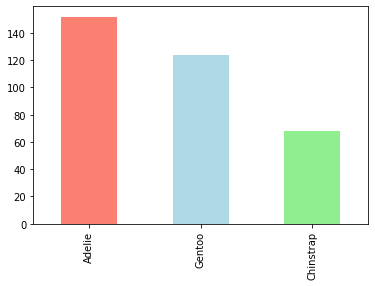

In [218]:
counted_targets.plot(kind="bar", color=["salmon", "lightblue", "lightgreen"]);

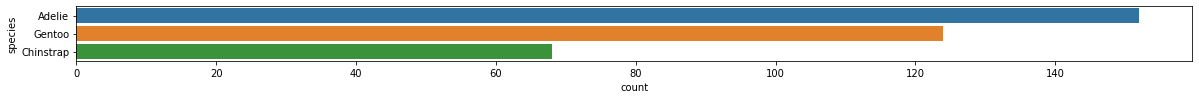

In [219]:
# seaborn
fig = plt.figure(figsize=(20,1))
sns.countplot(y='species', data=df);

In [220]:
df.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## Preprocessing target

In [221]:
# targets as list
list_of_target = df.species.tolist()

In [222]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list_of_target)

list(le.classes_)

encoded_target = le.transform(list_of_target) # array

In [223]:
# as a series
encoded_target_series = pd.Series(encoded_target, name='species')

In [224]:
# as a df
df_target_encoded = pd.DataFrame(encoded_target_series)
df_target_encoded

,species
0,0
1,0
2,0
3,0
4,0
...,...
339,1
340,1
341,1
342,1


# Concat (num's and cat's)

In [225]:
new_df = pd.concat([df_num, cat_dummies], axis=1, ignore_index=False)

In [226]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   body_mass_g        342 non-null    float64
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   sex_female         333 non-null    float64
 5   sex_male           333 non-null    float64
 6   island_Biscoe      333 non-null    float64
 7   island_Dream       333 non-null    float64
 8   island_Torgersen   333 non-null    float64
dtypes: float64(9)
memory usage: 26.7 KB


In [227]:
new_df.isnull().sum()

body_mass_g          0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
sex_female           9
sex_male             9
island_Biscoe        9
island_Dream         9
island_Torgersen     9
dtype: int64

In [228]:
new_df.dropna(inplace=True)#Удаляем строчки с пустыми значениями, если потом останется достаточно данных для обучения

In [229]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   body_mass_g        333 non-null    float64
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   sex_female         333 non-null    float64
 5   sex_male           333 non-null    float64
 6   island_Biscoe      333 non-null    float64
 7   island_Dream       333 non-null    float64
 8   island_Torgersen   333 non-null    float64
dtypes: float64(9)
memory usage: 26.0 KB


In [230]:
list_of_nums = list(df.describe().columns) # fast get num features
list_of_nums

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [231]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
new_df_scaled = new_df.copy()

new_df_scaled[list_of_nums] = scale.fit_transform(new_df_scaled[list_of_nums])

In [232]:
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# new_df = min_max_scaler.fit_transform(new_df[['Age','SibSp','Parch','norm_fare']])

In [233]:
new_df_scaled.head(3)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,-0.568475,-0.896042,0.780732,-1.426752,0.0,1.0,0.0,0.0,1.0
1,-0.506286,-0.822788,0.119584,-1.069474,1.0,0.0,0.0,0.0,1.0
2,-1.190361,-0.676280,0.424729,-0.426373,1.0,0.0,0.0,0.0,1.0


# Concat target

In [234]:
prepared_data = pd.concat([new_df_scaled, df_target_encoded], axis=1)
prepared_data.head(3)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species
0,-0.568475,-0.896042,0.780732,-1.426752,0.0,1.0,0.0,0.0,1.0,0
1,-0.506286,-0.822788,0.119584,-1.069474,1.0,0.0,0.0,0.0,1.0,0
2,-1.190361,-0.676280,0.424729,-0.426373,1.0,0.0,0.0,0.0,1.0,0


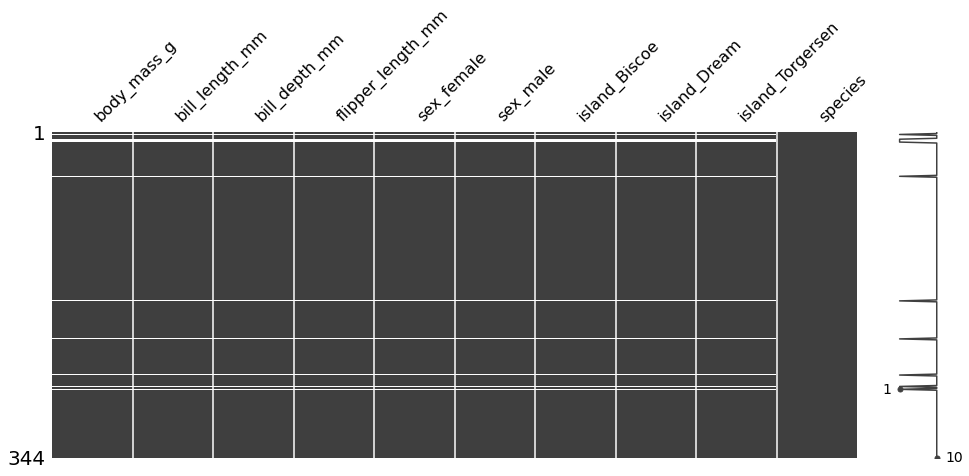

In [235]:
msno.matrix(prepared_data, figsize=(16, 6));

In [236]:
prepared_data.dropna(inplace=True) # Удаляем строчки с пустыми значениями, если потом останется достаточно данных для обучения

In [237]:
prepared_data.isna().sum()

body_mass_g          0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
sex_female           0
sex_male             0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
species              0
dtype: int64

In [238]:
prepared_data.head(3)

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species
0,-0.568475,-0.896042,0.780732,-1.426752,0.0,1.0,0.0,0.0,1.0,0
1,-0.506286,-0.822788,0.119584,-1.069474,1.0,0.0,0.0,0.0,1.0,0
2,-1.190361,-0.676280,0.424729,-0.426373,1.0,0.0,0.0,0.0,1.0,0


In [239]:
prepared_data.shape

(333, 10)

# Spliting

In [240]:
prepared_data.columns

Index(['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'sex_female', 'sex_male', 'island_Biscoe', 'island_Dream',
       'island_Torgersen', 'species'],
      dtype='object')

In [241]:
X = prepared_data.drop('species', axis='columns')   # data
y = prepared_data.species                           # target

In [242]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=42)

In [243]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 9)
(67, 9)
(266,)
(67,)


# Train model

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [245]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation:", cv)
log_acc = cv.mean()
print("acuracy:", log_acc)

Cross validation: [0.98148148 1.         1.         1.         1.        ]
acuracy: 0.9962962962962962


In [246]:
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68518519 0.77358491 0.67924528 0.71698113 0.64150943]
0.6993011879804332


In [247]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.92592593 0.98113208 0.94339623 0.9245283  0.98113208]
0.9512229210342417


In [248]:
svcl = LinearSVC()
cv = cross_val_score(svcl, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.98148148 1.         1.         0.98113208 1.        ]
0.992522711390636


In [249]:
svc = SVC(probability = True)
cv = cross_val_score(svc, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.98148148 1.         1.         1.         1.        ]
0.9962962962962962


In [250]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.98148148 1.         1.         0.98113208 1.        ]
0.992522711390636


In [251]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train, y_train, cv=5)
print(cv)
rf_acc = cv.mean()
print(rf_acc)

[0.98148148 0.98113208 1.         0.98113208 1.        ]
0.9887491264849755


In [252]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.96296296 0.98113208 0.98113208 0.96226415 1.        ]
0.9774982529699511


In [253]:
from sklearn.ensemble import GradientBoostingClassifier

dbc = GradientBoostingClassifier()
cv = cross_val_score(dbc, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.96296296 0.98113208 0.98113208 0.94339623 1.        ]
0.9737246680642908


In [254]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
cv = cross_val_score(ada, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83333333 0.83018868 0.73584906 0.96226415 0.83018868]
0.8383647798742139


In [255]:
from sklearn.ensemble import BaggingClassifier

bgc = BaggingClassifier()
cv = cross_val_score(bgc, x_train, y_train, cv=5)
print(cv)
bagg_acc = cv.mean()
print(bagg_acc)

[0.96296296 0.98113208 0.96226415 0.94339623 0.98113208]
0.96617749825297


In [256]:
from sklearn.ensemble import ExtraTreesClassifier

ext = ExtraTreesClassifier(random_state = 1)
cv = cross_val_score(ext, x_train, y_train, cv=5)
print(cv)
ext_acc = cv.mean()
print(ext_acc)

[0.98148148 1.         1.         0.98113208 1.        ]
0.992522711390636


In [257]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "GaussianNB": GaussianNB(),
          "DT": DecisionTreeClassifier(),
          "LinearSVC": LinearSVC(),
          "SVC": SVC(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier(),
          "XGB": XGBClassifier(),
          "GBC": GradientBoostingClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "BaggingClassifier": BaggingClassifier(),
          "ExtraTreesClassifier": ExtraTreesClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}
    # цикл, проходящий по моделям
    for name, model in models.items():
        # обучение
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [258]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'AdaBoost': 0.746268656716418,
 'BaggingClassifier': 1.0,
 'DT': 1.0,
 'ExtraTreesClassifier': 1.0,
 'GBC': 1.0,
 'GaussianNB': 0.7611940298507462,
 'KNeighborsClassifier': 1.0,
 'LinearSVC': 1.0,
 'Logistic Regression': 1.0,
 'RandomForestClassifier': 1.0,
 'SVC': 1.0,
 'XGB': 1.0}

In [259]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,GaussianNB,DT,LinearSVC,SVC,KNeighborsClassifier,RandomForestClassifier,XGB,GBC,AdaBoost,BaggingClassifier,ExtraTreesClassifier
accuracy,1.0,0.761194,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.746269,1.0,1.0


In [260]:
compare_models = model_compare.T

In [261]:
pd.set_option('display.max_rows', df.shape[0]+1)

compare_models.head(13)

,accuracy
Logistic Regression,1.000000
GaussianNB,0.761194
DT,1.000000
LinearSVC,1.000000
SVC,1.000000
KNeighborsClassifier,1.000000
RandomForestClassifier,1.000000
XGB,1.000000
GBC,1.000000
AdaBoost,0.746269
